<a href="https://colab.research.google.com/github/shashwat1998/YOLOv5/blob/master/YOLOv5_SoccerDataset_100epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Isabek/XmlToTxt
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/shashwat1998/YOLOv5

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 50 (delta 1), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (50/50), done.
Cloning into 'yolov5'...
remote: Enumerating objects: 909, done.
remote: Total 909 (delta 0), reused 0 (delta 0), pack-reused 909
Receiving objects: 100% (909/909), 3.38 MiB | 2.95 MiB/s, done.
Resolving deltas: 100% (604/604), done.
Cloning into 'YOLOv5'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 414 (delta 3), reused 5 (delta 1), pack-reused 397
Receiving objects: 100% (414/414), 424.09 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (193/193), done.
Checking out files: 100% (851/851), done.


In [1]:
%cd yolov5
!pip install -U -r requirements.txt
%cd ..

/content/yolov5
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-pbi1foiv
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-pbi1foiv
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 2)) (0.29.20)
Requirement already up-to-date: numpy==1.17 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 3)) (1.17.0)
Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (4.2.0.34)
Requirement already up-to-date: torch>=1.4 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (1.5.1+cu101)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 6)) (3.2.2)
Requirement already up-to-date: pillow in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (7.2.0)
Requirement alre

In [2]:
%cd XmlToTxt
!pip install -U -r requirements.txt
%cd ..

/content/XmlToTxt
Requirement already up-to-date: declxml==0.9.1 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 1)) (0.9.1)
/content


In [3]:
!cp -rf XmlToTxt/* ./

In [4]:
!cp -rf YOLOv5/* ./

In [5]:
!python xmltotxt.py -xml labels/val -out labels/val1

In [6]:
!python xmltotxt.py -xml labels/train -out labels/train1

In [7]:
!rm -rf labels/train
!rm -rf labels/val

In [8]:
!mv labels/val1 labels/val
!mv labels/train1 labels/train

In [9]:
!mkdir -p soccer

In [10]:
!cp -rf images ./soccer/images/

In [11]:
!cp -rf labels ./soccer/labels/

In [12]:
%cd yolov5/

/content/yolov5


In [14]:
!python train.py --batch 16 --epochs 50 --data ./data/soccer.yaml --cfg ./models/yolov5s.yaml --weights ''

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/soccer.yaml', device='', epochs=50, evolve=False, img_size=[640, 640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

2020-07-02 15:13:47.841041: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

        

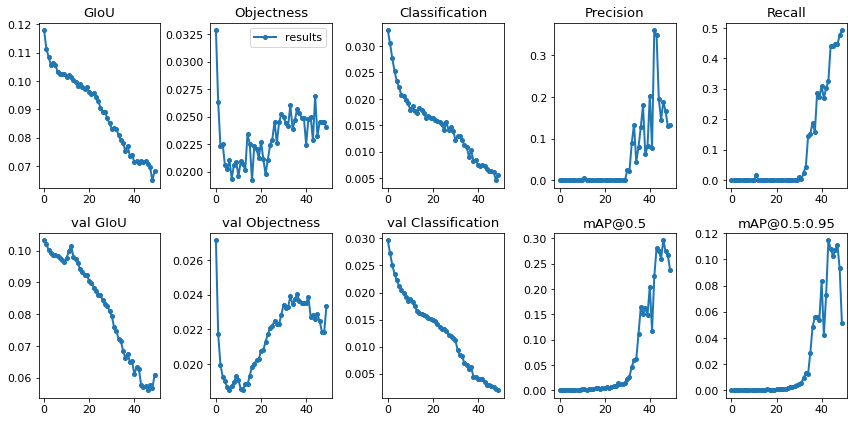

In [15]:
from utils.utils import plot_results
plot_results()

In [16]:
!python test.py --weights weights/last.pt --data ./data/soccer.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/soccer.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 191 layers, 7.25779e+06 parameters, 0 gradients
Fusing layers...
Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
Caching labels /content/soccer/labels/val (191 found, 0 missing, 0 empty, 0 duplicate, for 191 images): 100% 191/191 [00:00<00:00, 6436.50it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 6/6 [00:15<00:00,  2.61s/it]
                 all         191         231      0.0898       0.489       0.188      0.0437
                ball         191         177       0.061       0.701       0.265      0.0594
           goal post         191          54       0.119       0.278       0.112

In [17]:
!python test.py --weights weights/best.pt --data ./data/soccer.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/soccer.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 191 layers, 7.25779e+06 parameters, 0 gradients
Fusing layers...
Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
Caching labels /content/soccer/labels/val (191 found, 0 missing, 0 empty, 0 duplicate, for 191 images): 100% 191/191 [00:00<00:00, 7459.14it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 6/6 [00:15<00:00,  2.60s/it]
                 all         191         231       0.298       0.355       0.258      0.0965
                ball         191         177       0.296       0.542       0.393       0.154
           goal post         191          54         0.3       0.167       0.123

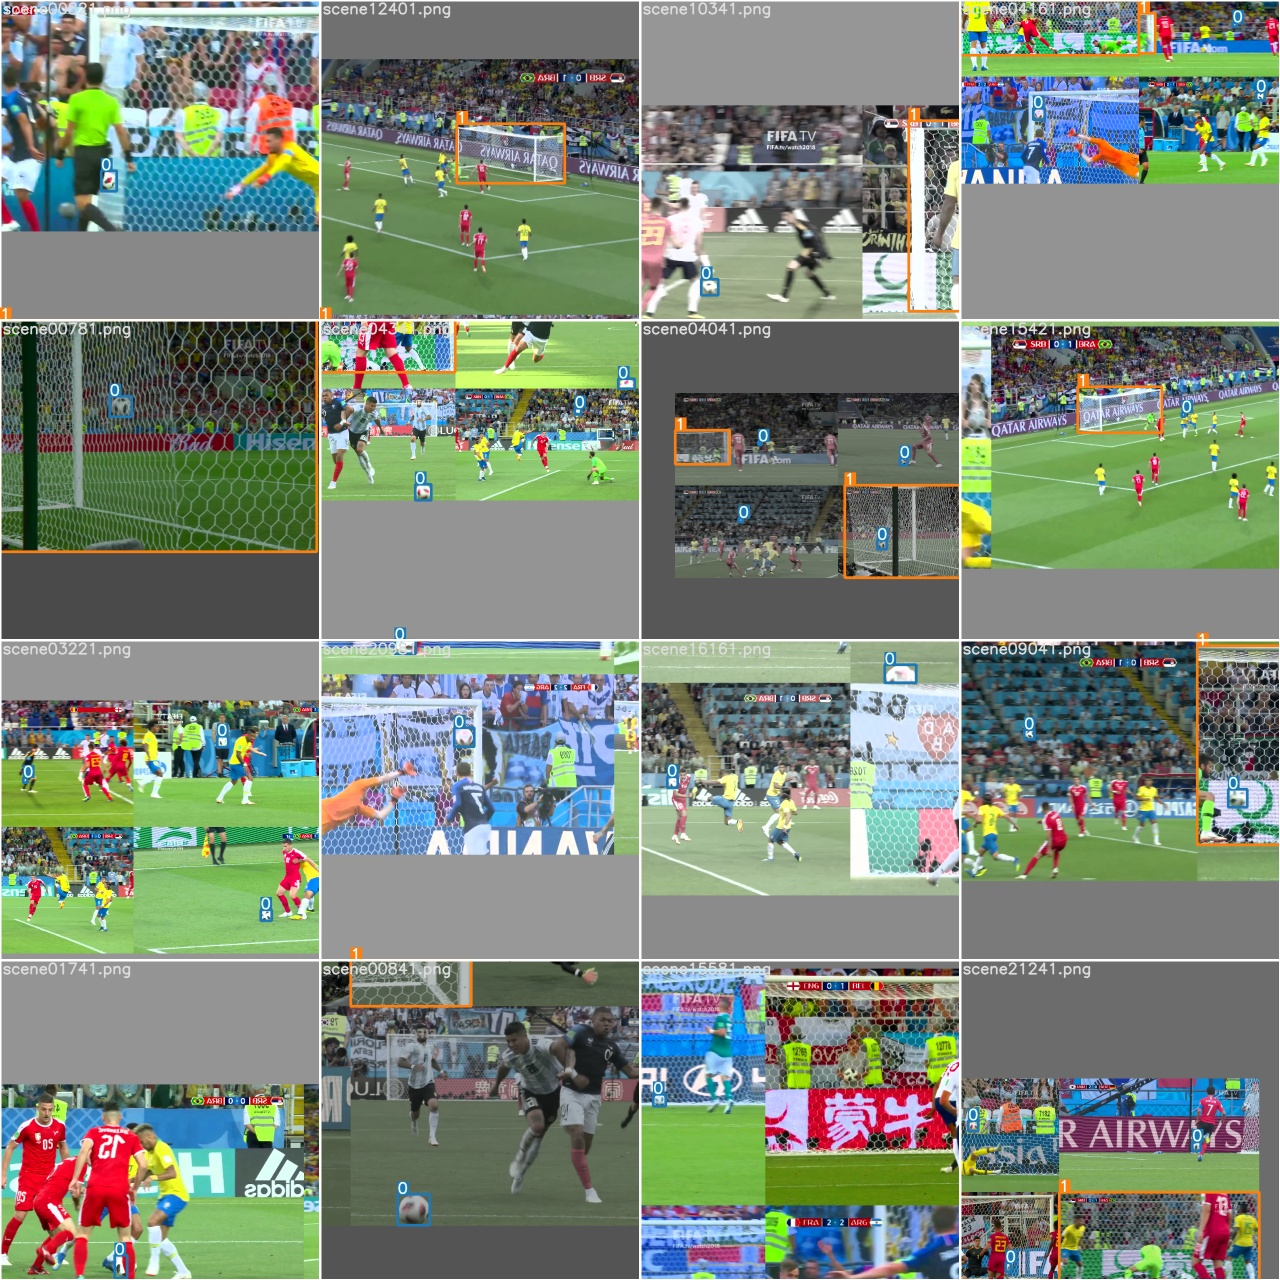

In [18]:
from IPython.display import Image, clear_output  # to display images
Image(filename='./train_batch0.jpg', width=900)

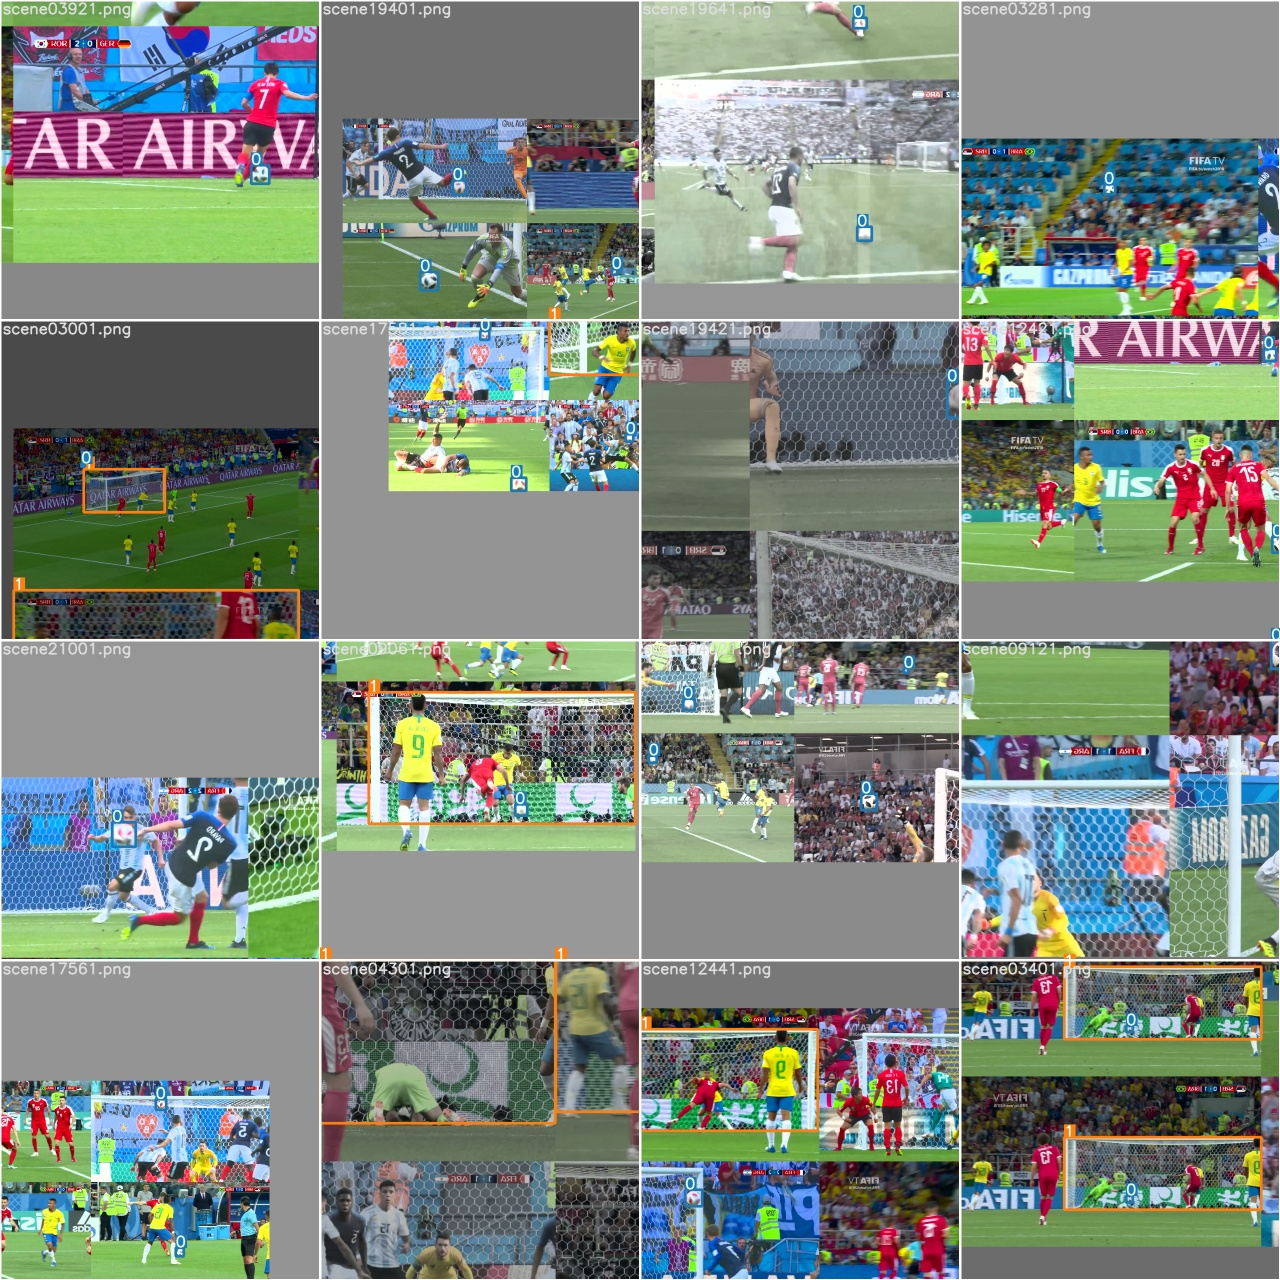

In [19]:
Image(filename='./train_batch1.jpg', width=900)

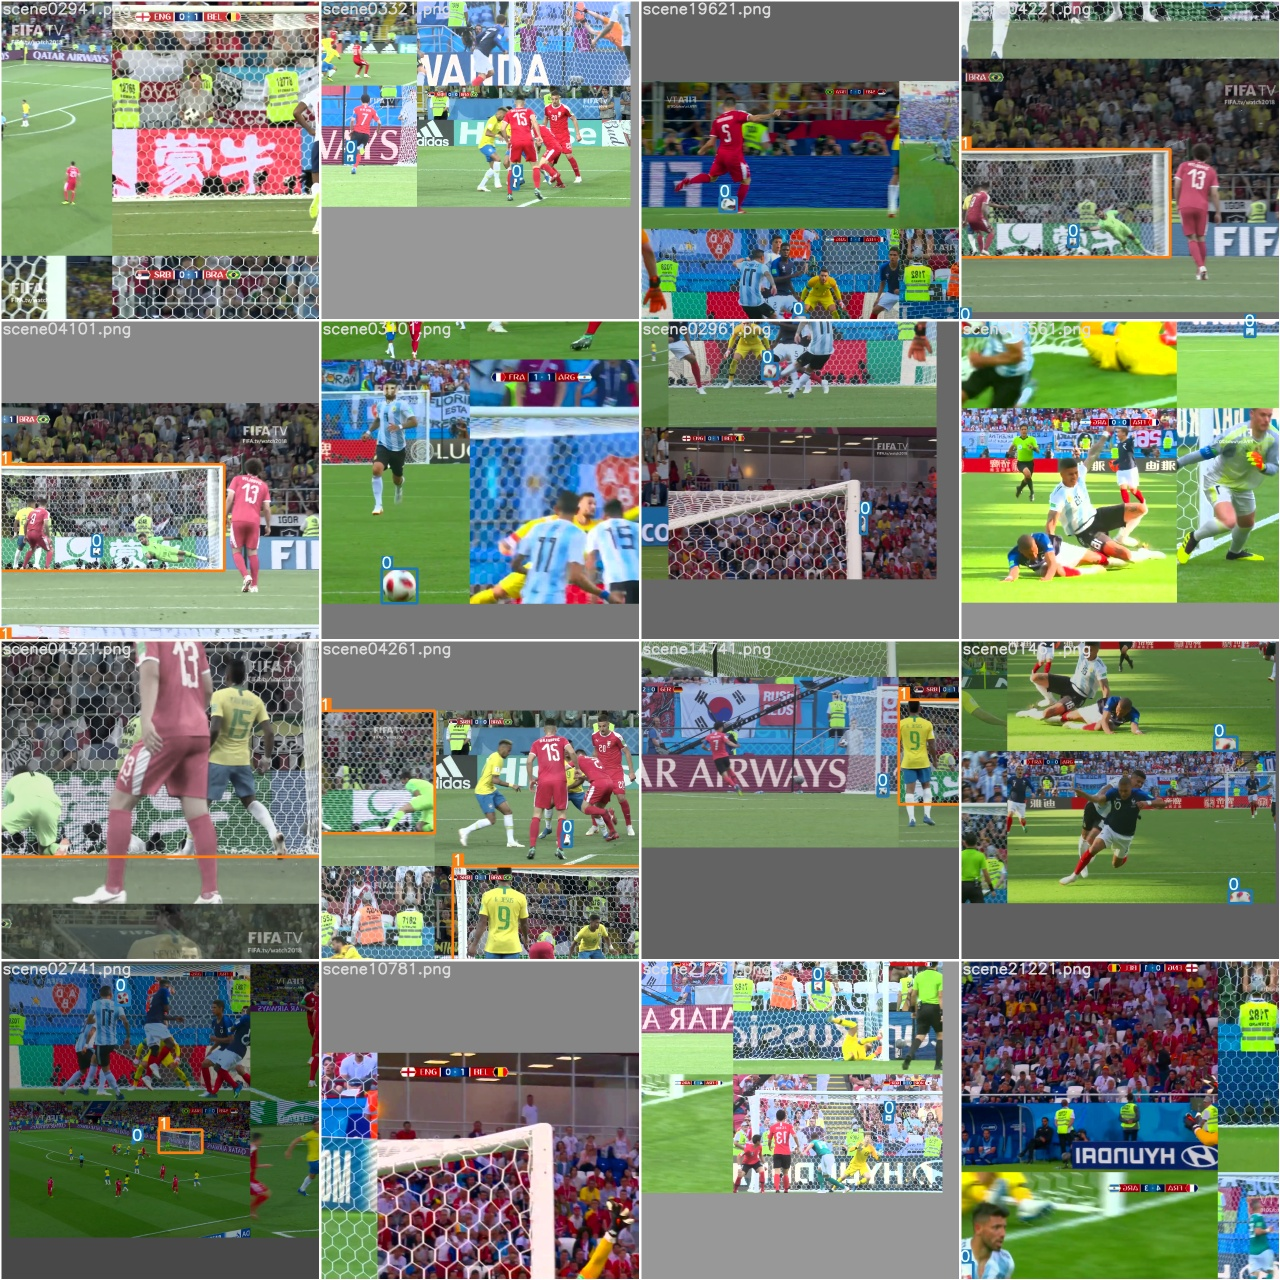

In [20]:

Image(filename='./train_batch2.jpg', width=900)

In [21]:
!python detect.py --weights weights/last.pt --img 416 --source /content/soccer/images/train

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/soccer/images/train', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/191 /content/soccer/images/train/scene00601.png: 288x416 Done. (0.016s)
image 2/191 /content/soccer/images/train/scene00621.png: 288x416 Done. (0.015s)
image 3/191 /content/soccer/images/train/scene00641.png: 288x416 Done. (0.016s)
image 4/191 /content/soccer/images/train/scene00661.png: 288x416 Done. (0.015s)
image 5/191 /content/soccer/images/train/scene00681.png: 288x416 Done. (0.015s)
image 6/191 /content/soccer/images/train/scene00701.png: 288x416 Done. (0.015s)
image 7/191 /content/soccer/images/train/scene00721.png: 288x416 1 balls, Done. (0.018s)
image 8/191 /content/soccer/images/train/scene00741.png: 288x416 Done. (0.015s)
image 9/191 /c

In [22]:
!python detect.py --weights weights/best.pt --img 416 --source /content/soccer/images/train

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/soccer/images/train', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/191 /content/soccer/images/train/scene00601.png: 288x416 Done. (0.021s)
image 2/191 /content/soccer/images/train/scene00621.png: 288x416 Done. (0.020s)
image 3/191 /content/soccer/images/train/scene00641.png: 288x416 Done. (0.020s)
image 4/191 /content/soccer/images/train/scene00661.png: 288x416 Done. (0.020s)
image 5/191 /content/soccer/images/train/scene00681.png: 288x416 Done. (0.020s)
image 6/191 /content/soccer/images/train/scene00701.png: 288x416 Done. (0.020s)
image 7/191 /content/soccer/images/train/scene00721.png: 288x416 1 balls, Done. (0.022s)
image 8/191 /content/soccer/images/train/scene00741.png: 288x416 Done. (0.021s)
image 9/191 /c